In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import collections
from functions import read_folder, read_bz2, split_by_time, find_burst, plot_burst, build_graph, findQuasiClique, find_original,find_event

In [2]:
#read the whole folder
path = "data"
keyword = ' LG '

#some words are not useful for events detection. for example, there are many ads with 'phone'
list_ignore = ['phone','smartphone']

#you can also specify the number of files with num = 10, for example
terms_stop, dates, whole_tweets, num_tweet, duree = read_folder(path, keyword, list_ignore)

100%|██████████| 65/65 [12:27<00:00, 11.50s/it]


In [3]:
print 'Cost time in s: ' + str(duree)
print 'Total number of tweets:' + str(num_tweet)
print 'Number of tweets containing ' + str(keyword) +': ' + str(len(dates))

Cost time in s: 746.844000101
Total number of tweets:55034364
Number of tweets containing  LG : 2179


In [4]:
# define the length of period
accumulated_num, frequency = split_by_time(dates, periode= 60 * 60 * 20)
print 'There are totally '+str(len(frequency)) + ' periods.'
#print 'Accumulated number of tweets: ' + str(accumulated_num)
#print 'Frequency of tweets every perid: ' + str(frequency)

There are totally 71 periods.


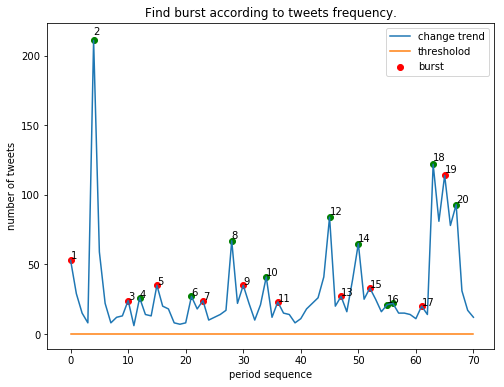

In [5]:
#plot a graph showing the location of bursts
n_burst = 40
threshold = 0
ind_burst, list_word = find_burst(frequency, accumulated_num,terms_stop, threshold, n_burst)
figsize = (8,6)
%matplotlib inline
plot_burst(ind_burst, figsize, frequency, threshold)

In [6]:
#quasi clique algorith
gamma = 0.45
numClique = 12
num_words = 150
ignore = 'iphone'
list_date, list_whole, list_clique = find_event(keyword, ignore, ind_burst, list_word, accumulated_num, terms_stop, whole_tweets, dates)

In [7]:
#how many events detected from the given bursts
len(list_date)

13

In [8]:
#print the tweets corresponding to cliques
for i in list_whole:
    print i
    print " "

A robot created by LG to help users control their smart home repeatedly failed on stage at its CES debut.
 
@tsubasaDT_en Was playing earlier today. Now the game crashes after 2 seconds on the loading screen. Tried reinstalling. Using a LG G6
 
People laughed on lg g3 coz of its big size in 2014 now they laugh at its front facing camera quality
 
RT @Hgni16: @LGNordic Why the slow LG G6 updates? I'm still on the July security patch???  And still no news on the Oreo update?
 
@CHKN_SPAGHETTI 
Agreed &amp; u can add LG to that.My LG G5 was hugely underrated &amp; the specs are great too.The dual lens camera is fantastic
 
RT @geekyranjit: Was playing around with LG V30+ camera modes and this is the popup mode in camera, it uses both the regular camera and wid…
 
@UnboxTherapy LG G3. Over 2.5 years old. Still works perfectly fine for me. Awesome screen, rear-keys, robust and so on. Will grab V30 soon!
 
@stevepal21 @fkajack They’ve had very similar career trajectories tbh besides the fact

In [9]:
#save the results in excel or show it
df_p = pd.DataFrame({'Date': list_date, 'Clique Words': list_clique, 'Tweets':list_whole})
df_p = df_p.sort_values('Date')
df_p
#df_p.to_excel(str(keyword)+'20.xlsx', sheet_name='sheet1', index=False)

,Clique Words,Date,Tweets
8,"[know, camera, consider, preferred, series, ba...",2017-11-15 14:31:09,@FormulaSmith I may consider LG V series or Ga...
3,"[updates, security, smdh, broken, news, gpad, ...",2017-11-20 15:56:44,RT @Hgni16: @LGNordic Why the slow LG G6 updat...
9,"[first, screen, anytime, easy, ratio, beast, c...",2017-11-25 13:08:05,@LGIndia This is the beast anytime ! LG the fi...
10,"[spend, screen, sad, win, referring, big, priz...",2017-12-07 16:48:18,@evleaks If you referring to BIG size of Nav B...
1,"[playing, screen, loading, game, ugh, hear, so...",2017-12-13 12:07:30,@tsubasaDT_en Was playing earlier today. Now t...
5,"[playing, mode, regular, bookah, popup, wid, c...",2017-12-23 04:51:07,RT @geekyranjit: Was playing around with LG V3...
6,"[left, screen, fine, old, rear, awesome, grab,...",2017-12-24 12:25:02,@UnboxTherapy LG G3. Over 2.5 years old. Still...
7,"[fact, screen, similar, films, spins, shade, c...",2017-12-28 18:45:40,@stevepal21 @fkajack They’ve had very similar ...
4,"[playing, camera, agreed, fantastic, hugely, s...",2018-01-01 08:02:58,@CHKN_SPAGHETTI \nAgreed &amp; u can add LG to...
11,"[first, camera, samples, headphone, monster, j...",2018-01-06 12:28:19,RT @gavinfabiani: Take 2. LG V30+ First Impres...
